In [1]:
#Data and numerical manipulations
import pandas as pd
import numpy as np
import csv

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Acquisition and pre-processing
from sklearn import datasets

#Import PCA function from pca library
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
DF = pd.read_csv("customer.csv")
DF.columns

Index(['customer_id', 'lat', 'lng', 'population', 'children', 'age', 'income',
       'marital', 'churn', 'gender', 'tenure', 'monthly_charge',
       'bandwidth_gp_year', 'outage_sec_week', 'email', 'contacts',
       'yearly_equip_faiure', 'techie', 'port_modem', 'tablet', 'job_id',
       'payment_id', 'contract_id', 'location_id'],
      dtype='object')

In [3]:
#Select numerical variables of interest
my_data = DF.select_dtypes(exclude = 'object')
my_data.columns

Index(['lat', 'lng', 'population', 'children', 'age', 'income', 'tenure',
       'monthly_charge', 'bandwidth_gp_year', 'outage_sec_week', 'email',
       'contacts', 'yearly_equip_faiure', 'job_id', 'payment_id',
       'contract_id', 'location_id'],
      dtype='object')

In [4]:
my_data.shape

(10000, 17)

In [5]:
my_data = DF.select_dtypes('number')
my_data.columns

Index(['lat', 'lng', 'population', 'children', 'age', 'income', 'tenure',
       'monthly_charge', 'bandwidth_gp_year', 'outage_sec_week', 'email',
       'contacts', 'yearly_equip_faiure', 'job_id', 'payment_id',
       'contract_id', 'location_id'],
      dtype='object')

In [6]:
my_data.shape

(10000, 17)

In [7]:
#Select continuous variables of interest for pca
cv = my_data.drop(['lat', 'lng', 'job_id', 'payment_id', 'contract_id', 'location_id'], axis=1)
cv.columns

Index(['population', 'children', 'age', 'income', 'tenure', 'monthly_charge',
       'bandwidth_gp_year', 'outage_sec_week', 'email', 'contacts',
       'yearly_equip_faiure'],
      dtype='object')

In [8]:
cv.shape

(10000, 11)

In [9]:
#Handle missing values
cv.isnull().sum().sum()
#Handle null values in each column
cv.isna().sum()
#Handle null values in each row
cv.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64

In [10]:
import scipy.stats as stats 
cv.head()

,population,children,age,income,tenure,monthly_charge,bandwidth_gp_year,outage_sec_week,email,contacts,yearly_equip_faiure
0,38,0,68,28561.99,6.795513,172.455519,904.536110,7.978323,10,0,1
1,10446,1,27,21704.77,1.156681,242.632554,800.982766,11.699080,12,0,1
2,3735,4,50,9609.57,15.754144,159.947583,2054.706961,10.752800,9,0,1
3,13863,1,48,18925.23,17.087227,119.956840,2164.579412,14.913540,15,2,0
4,11352,0,83,40074.19,1.670972,149.948316,271.493436,8.147417,16,2,1


In [11]:
#Zscore calculation
cv['zscore_population']=stats.zscore(cv.iloc[::,0])
cv[['population', 'zscore_population']].head()

,population,zscore_population
0,38,-0.673405
1,10446,0.047772
2,3735,-0.417238
3,13863,0.284537
4,11352,0.110549


(array([7.243e+03, 1.178e+03, 7.340e+02, 4.610e+02, 2.090e+02, 1.050e+02,
        3.500e+01, 2.400e+01, 8.000e+00, 3.000e+00]),
 array([     0.,  11185.,  22370.,  33555.,  44740.,  55925.,  67110.,
         78295.,  89480., 100665., 111850.]),
 <BarContainer object of 10 artists>)

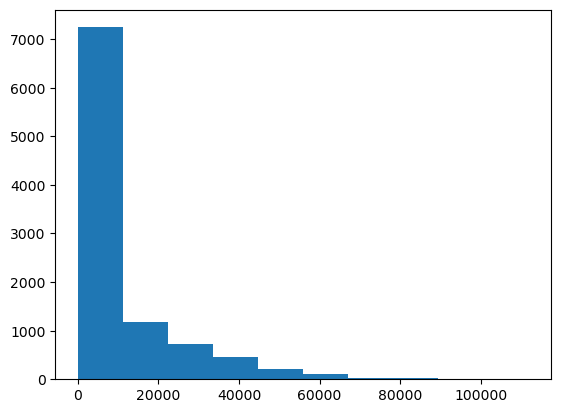

In [12]:
#Visualizations Histogram
from pandas import DataFrame
histplt, ex1 = plt.subplots()
ex1.hist(cv.iloc[::,0])

{'whiskers': [<matplotlib.lines.Line2D at 0x257a44ef350>,
 'caps': [<matplotlib.lines.Line2D at 0x257a4991810>,
 'boxes': [<matplotlib.lines.Line2D at 0x257a491fa50>],
 'medians': [<matplotlib.lines.Line2D at 0x257a4992e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x257a4991510>],
 'means': []}

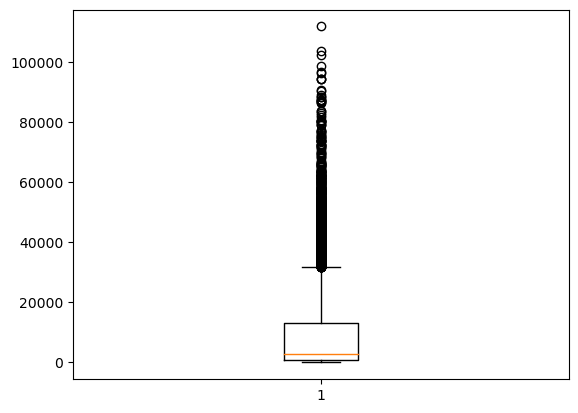

In [13]:
#Visualizations boxplots
boxplt, ex2 = plt.subplots()
ex2.boxplot(cv.iloc[::,0])

In [14]:
#Correlation heatmap
corr = cv.corr()

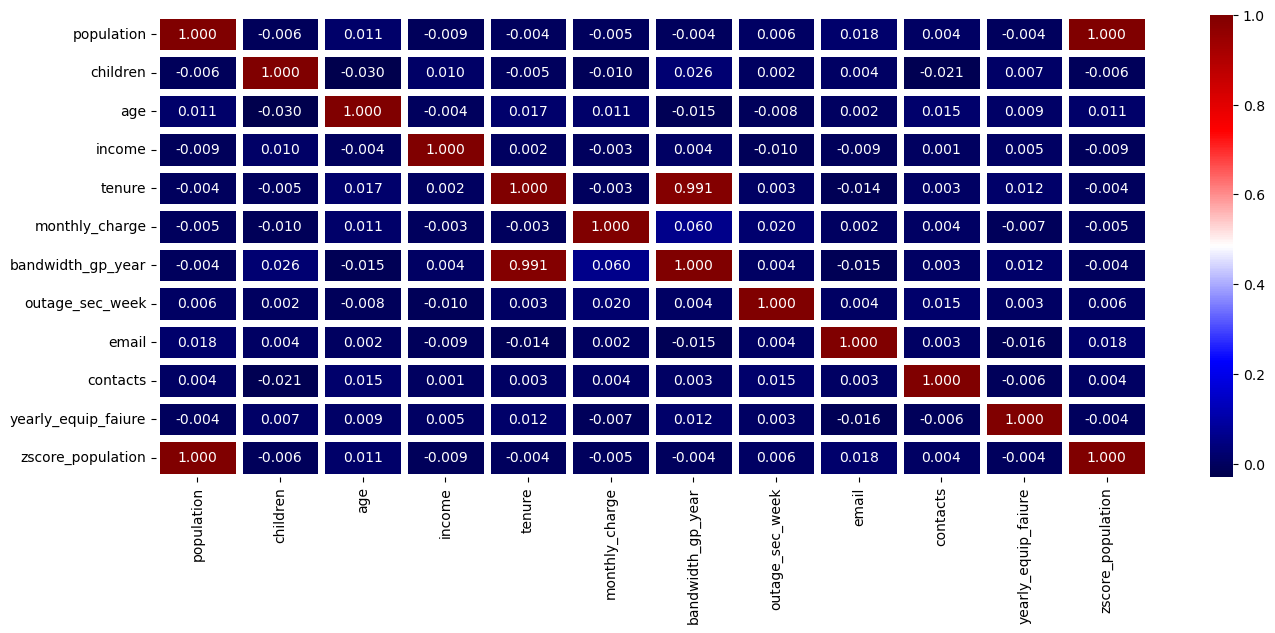

In [15]:
from sklearn import preprocessing
ax = plt.subplots(figsize=(16,6))
sns.heatmap(corr, cmap='seismic', linewidths=5, annot=True, fmt='.3f')
plt.show()

In [16]:
#Data normalization
robust = RobustScaler()
sd = robust.fit_transform(cv)
sd

array([[-0.23109413, -0.33333333,  0.41666667, ..., -0.5       ,
         1.        , -0.23109413],
       [ 0.60623492,  0.        , -0.72222222, ..., -0.5       ,
         1.        ,  0.60623492],
       [ 0.06633146,  1.        , -0.08333333, ..., -0.5       ,
         1.        ,  0.06633146],
       ...,
       [-0.20148833,  0.        , -0.13888889, ..., -0.5       ,
         0.        , -0.20148833],
       [ 2.62787611,  0.        , -0.38888889, ...,  0.        ,
         0.        ,  2.62787611],
       [ 0.74975865,  0.        , -0.69444444, ...,  0.        ,
         0.        ,  0.74975865]])

In [17]:
cv_normalized=(cv-cv.mean())/cv.std()

In [29]:
cv_normalized

,population,children,age,income,tenure,monthly_charge,bandwidth_gp_year,outage_sec_week,email,contacts,yearly_equip_faiure,zscore_population
0,-0.673371,-0.972289,0.720889,-0.398758,-1.048694,-0.003942,-1.138430,-0.679520,-0.666248,-1.005801,0.946611,-0.673371
1,0.047769,-0.506567,-1.259894,-0.641922,-1.261938,1.630244,-1.185817,0.570184,-0.005288,-1.005801,0.946611,0.047769
2,-0.417217,0.890602,-0.148723,-1.070831,-0.709904,-0.295210,-0.612107,0.252354,-0.996729,-1.005801,0.946611,-0.417217
3,0.284523,-0.506567,-0.245347,-0.740488,-0.659491,-1.226460,-0.561829,1.649837,0.986153,1.017537,-0.625832,0.284523
4,0.110543,-0.972289,1.445566,0.009477,-1.242489,-0.528059,-1.428113,-0.622726,1.316634,1.017537,0.946611,0.110543
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.631660,0.424879,-1.453141,0.564428,1.273337,-0.294469,1.427227,-0.196664,-0.005288,1.017537,-0.625832,-0.631660
9996,4.670744,0.890602,-0.245347,-0.201333,1.002690,0.811685,1.054142,-1.095256,0.986153,1.017537,-0.625832,4.670744
9997,-0.647873,-0.506567,-0.245347,0.219026,0.487489,-0.061726,0.350966,-1.145515,-0.666248,-1.005801,-0.625832,-0.647873
9998,1.788885,-0.506567,-0.680153,-0.820547,1.382949,1.862911,1.407643,0.695408,0.655673,0.005868,-0.625832,1.788885


In [28]:
cv_normalized.to_csv('d212PCAnormalized.csv', index=False)

In [21]:
#Create PCA 
pca = PCA(n_components=sd.shape[1])
pca.fit(cv_normalized)
cv_pca = pd.DataFrame(pca.transform(cv_normalized),     
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10', 'PC11', 'PC12'])

In [31]:
cv_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.045824,-1.813197,0.204097,1.445983,0.088640,-1.270830,0.667831,-0.107529,-0.447785,0.189944,-0.026619,-3.550531e-17
1,0.951145,-1.359970,-0.080720,-0.971754,1.248553,-1.124093,1.115775,-0.245594,-0.691142,1.355675,-0.038359,1.087012e-16
2,-0.018804,-1.096281,-1.060925,0.159836,0.902389,-1.615509,-0.081173,-0.380169,0.438268,-0.341159,0.060821,-3.517407e-16
3,0.908498,-0.525442,0.893912,-1.243151,-0.248094,0.093084,-1.978436,-0.180291,-0.770905,-0.573797,0.129998,3.265878e-16
4,1.245782,-1.487580,1.392854,1.161323,-0.684468,-0.107665,-0.886646,1.554832,-0.133338,0.464916,-0.056536,2.763802e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.807190,1.073664,-0.640508,-0.640824,-0.245303,1.386724,-0.714290,-0.632323,0.252631,0.645215,0.081233,-4.426293e-16
9996,4.706432,4.874324,-0.017182,-0.725075,-0.883942,0.699180,0.200735,0.467775,1.454471,0.905045,-0.026344,2.047798e-15
9997,-1.105081,-0.043013,-0.567113,0.700926,-0.884395,-0.046230,1.018394,-0.876086,-0.296284,0.089582,-0.086942,-1.054413e-16
9998,1.013183,3.087222,1.022385,-1.774123,0.164523,-0.298145,0.915248,-0.324628,-0.153694,0.790353,-0.069396,8.458873e-16


In [37]:
exp_var = pca.explained_variance_ratio_
exp_var

array([3.84667976e-01, 9.81174877e-02, 8.18187110e-02, 8.11435413e-02,
       7.34568156e-02, 7.27400566e-02, 6.84869812e-02, 5.75806500e-02,
       4.70276718e-02, 3.47664405e-02, 1.93668540e-04, 6.61297652e-32])

In [39]:
pcomp = np.arange(pca.n_components_) + 1
pcomp

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [40]:
pca_model = pca.fit_transform(sd)
pca_model

array([[-1.10699389e+00, -3.11061859e-01,  6.67832761e-01, ...,
        -5.09458586e-01, -1.32665289e-02,  6.71696105e-14],
       [ 7.79543400e-02, -5.76656487e-01, -1.99770637e-01, ...,
        -4.70924288e-01, -1.89659529e-02, -1.22743562e-15],
       [-6.89987790e-01, -8.33653893e-01,  6.59802142e-01, ...,
        -4.64359656e-01,  3.03437692e-02,  1.04081281e-15],
       ...,
       [-1.07265957e+00,  2.32219313e-01,  7.83187066e-01, ...,
        -4.87355144e-01, -4.33578132e-02,  1.46707892e-17],
       [ 2.94316598e+00, -7.32299771e-01, -5.79405445e-01, ...,
        -1.46865225e-02, -3.45221108e-02, -2.31528722e-16],
       [ 2.96903073e-01, -1.00064123e+00, -1.23859115e+00, ...,
         4.62274483e-03, -1.68299771e-02,  1.07823043e-16]])

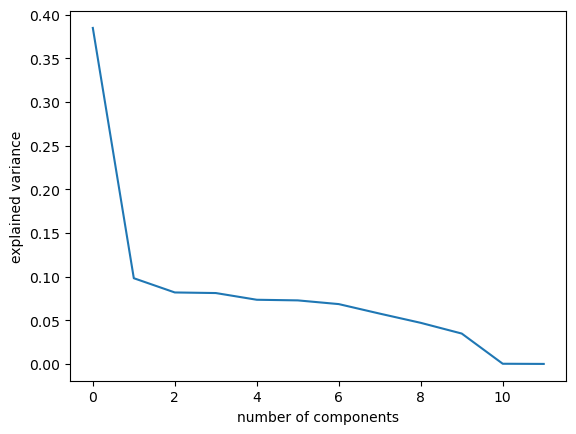

In [41]:
#Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [24]:
#Eigenvalues
cov_matrix = np.dot(cv_normalized.T, cv_normalized) / cv.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

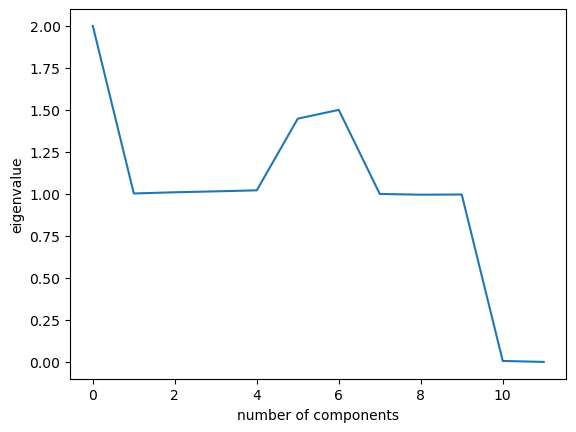

In [25]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show() 

In [27]:
#Loadings
loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10', 'PC11', 'PC12'],
     index=cv.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
population,0.707036,0.004762,0.007393,0.001265,0.002204,0.002245,0.001197,0.000932,-0.002948,-0.000702,-0.000074,-7.071068e-01
children,-0.003195,0.033575,-0.038000,0.001531,0.965092,0.099606,0.223601,-0.021189,0.069209,0.025143,-0.014988,3.330669e-16
age,0.004219,-0.006056,0.005100,-0.011095,-0.069103,0.015222,-0.003393,0.049037,0.994910,-0.046389,0.019363,2.602085e-18
income,-0.005906,0.996522,-0.066958,0.029733,-0.037695,-0.005470,0.001873,-0.007902,0.004542,-0.002071,-0.000562,1.994932e-17
tenure,-0.001344,0.006710,0.050369,0.061951,0.068311,0.437055,-0.537549,-0.043183,0.012462,-0.004846,-0.711964,1.415968e-16
monthly_charge,-0.002493,-0.013222,-0.052691,0.155668,-0.218965,0.733055,0.619893,0.040124,-0.023889,-0.003497,-0.032170,7.806256e-18
bandwidth_gp_year,-0.001521,0.007920,0.048034,0.070295,0.081805,0.479231,-0.512578,-0.043743,-0.014383,-0.001908,0.701050,-1.353084e-16
outage_sec_week,0.003207,-0.052294,-0.368570,0.911019,0.015994,-0.164024,-0.060457,-0.010111,0.014792,-0.017885,0.000183,3.035766e-18
email,0.010533,-0.050786,-0.921256,-0.367595,-0.021246,0.069295,-0.079480,0.043217,-0.004820,-0.003192,0.000165,5.204170e-18
contacts,0.001357,-0.000296,-0.008835,0.015320,-0.028142,0.000991,-0.007762,-0.009622,0.045255,0.998344,-0.000948,1.301043e-17


In [30]:
loadings.to_csv('d212PCAloadings.csv', index=False)

In [47]:
pc_contributions = list(pca.explained_variance_ratio_)
pc_names = list(loadings.columns)
for i in range(len(pc_names)):
    print(f"For {pc_names[i]}, the contribution is {round(pc_contributions[i] * 100, 3)}%")

For PC1, the contribution is 38.467%
For PC2, the contribution is 9.812%
For PC3, the contribution is 8.182%
For PC4, the contribution is 8.114%
For PC5, the contribution is 7.346%
For PC6, the contribution is 7.274%
For PC7, the contribution is 6.849%
For PC8, the contribution is 5.758%
For PC9, the contribution is 4.703%
For PC10, the contribution is 3.477%
For PC11, the contribution is 0.019%
For PC12, the contribution is 0.0%
